In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import umap
import plotly.express as px

from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from straight_walking_speed import plot_straight_walking_speed
from os.path import join as oj

from get_trial_profile import get_trial_profile
from plot_decision_composition import plot_decision_composition

In [27]:
animal = 'RRM028'
session = 'Day123'
root_folder = '/Users/yang/Documents/Wilbrecht_Lab/data4analysis/preprocessed_data'


# following code block is used to extract assigned animal and session
animal_folder = oj(root_folder, animal)

dataframes = []

# Check if the animal folder exists
if os.path.isdir(animal_folder):
    session_folder = oj(animal_folder, session)
    if os.path.isdir(session_folder):
        for filename in os.listdir(session_folder):
            if filename.startswith(f'{animal}_{session}') and filename.endswith('_processed.csv'):
                file_path = oj(session_folder, filename)
                df = pd.read_csv(file_path, index_col=0)
                dataframes.append(df)
    else:
        print('No matching session folder found.')
else:
    print('No matching animal folder found.')

if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
else:
    print("No matching files found.")

# following code is used to read the existing super_df
#combined_df = pd.read_csv(oj(root_folder, 'combined_df.csv'), index_col=0)

In [28]:
print(combined_df.shape)
combined_df.head()


(31082, 36)


,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,...,Torso displacement,Tailhead displacement,Head velocity,Neck velocity,Torso velocity,Tailhead velocity,Head acceleration,Neck acceleration,Torso acceleration,Tailhead acceleration
0,93.850151,114.754120,250.100388,90.738701,77.220322,113.602806,65.835464,110.060135,286.035423,129.085692,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4736.981844,49.265750,4828.880910,5595.554633
1,98.789421,114.932777,250.033386,90.714592,82.292999,113.882332,73.308884,110.673836,286.109157,123.822896,...,5.365423,6.217283,157.899395,1.642192,160.962697,186.518488,1016.860861,19.954558,762.245997,-402.643804
2,106.115051,114.889954,250.005417,90.682884,89.687508,114.026840,78.735428,111.092056,285.978506,117.431072,...,6.212363,5.769901,191.794757,2.307344,186.370897,173.097028,606.266909,31.093242,118.982787,514.122472
3,113.978836,114.303085,250.026154,90.687927,96.894341,114.388321,85.340401,113.985893,285.752092,110.367912,...,6.344566,6.341148,212.003654,3.343785,190.336990,190.234443,-305.085927,299.148802,-165.429298,643.518663
4,121.699074,114.651543,249.978943,90.687981,102.654854,114.350739,93.507980,113.785591,285.886883,103.641458,...,6.160756,7.056169,201.834123,13.315412,184.822680,211.685066,-493.982409,1567.417129,604.635423,-180.937167


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


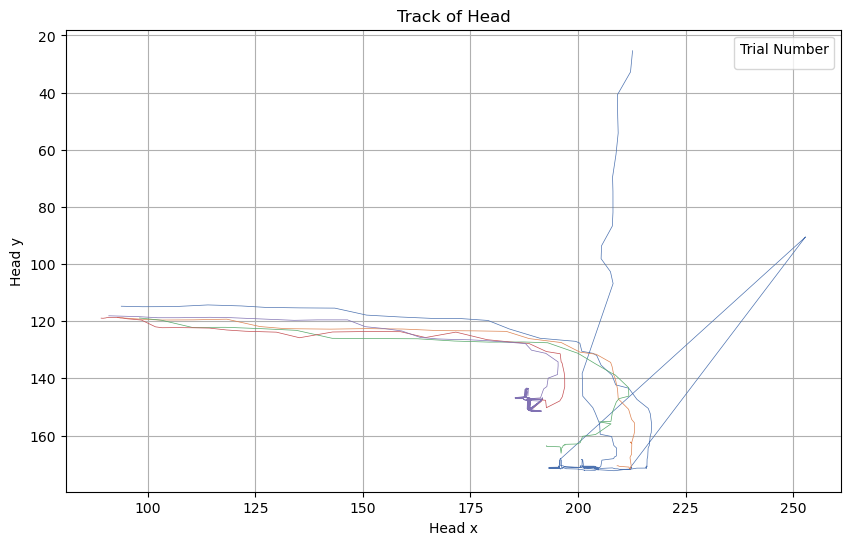

In [36]:
# Define the start and stop frames
start_frame, stop_frame = 0, 1000

# Filter the dataframe for the specified frame range
filtered_df = combined_df.iloc[start_frame:stop_frame]

plt.figure(figsize=(10, 6))

palette = sns.color_palette('deep', n_colors=len(filtered_df['trial'].unique()))

for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial')):
    sns.lineplot(
        data=group,
        x='Head x',
        y='Head y',
        color=color,
        linewidth=0.5,
        legend=False,
        sort=False
    )

plt.xlabel('Head x')
plt.ylabel('Head y')
plt.title('Track of Head')
plt.legend(title='Trial Number', loc='upper right')
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


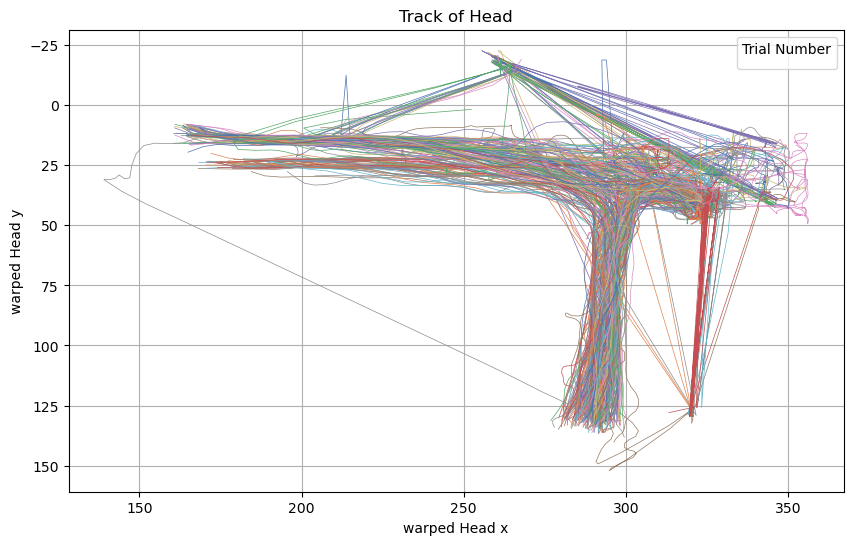

In [30]:
# Define the start and stop frames
start_frame, stop_frame = 0, 40000

# Filter the dataframe for the specified frame range
filtered_df = combined_df.iloc[start_frame:stop_frame]

plt.figure(figsize=(10, 6))

palette = sns.color_palette('deep', n_colors=len(filtered_df['trial'].unique()))

for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial')):
    sns.lineplot(
        data=group,
        x='warped Head x',
        y='warped Head y',
        color=color,
        linewidth=0.5,
        legend=False,
        sort=False
    )

plt.xlabel('warped Head x')
plt.ylabel('warped Head y')
plt.title('Track of Head')
plt.legend(title='Trial Number', loc='upper right')
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

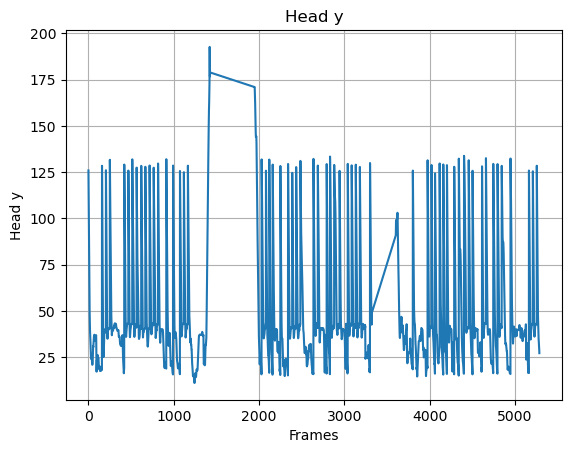

In [ ]:
plot_df = combined_df[0:5000]
sns.lineplot(data=plot_df, x=plot_df.index, y='warped Head y')
plt.title('Head y')
plt.xlabel('Frames')
plt.ylabel('Head y')
#plt.xlim(0, )
plt.grid(True)
plt.show()


In [ ]:
'''
# Extracting the data to be analyzed
data = df['Head yCoordinates']

# Detecting peaks
peaks, _ = find_peaks(data)

# Extracting peak values
peak_values = data[peaks]

# Plotting the data with peaks highlighted
plt.figure(figsize=(15, 6))
sns.lineplot(data=data)
plt.plot(peaks, peak_values, "x")  # Highlight peaks with 'x'
plt.show()
'''

'\n# Extracting the data to be analyzed\ndata = df[\'Head yCoordinates\']\n\n# Detecting peaks\npeaks, _ = find_peaks(data)\n\n# Extracting peak values\npeak_values = data[peaks]\n\n# Plotting the data with peaks highlighted\nplt.figure(figsize=(15, 6))\nsns.lineplot(data=data)\nplt.plot(peaks, peak_values, "x")  # Highlight peaks with \'x\'\nplt.show()\n'

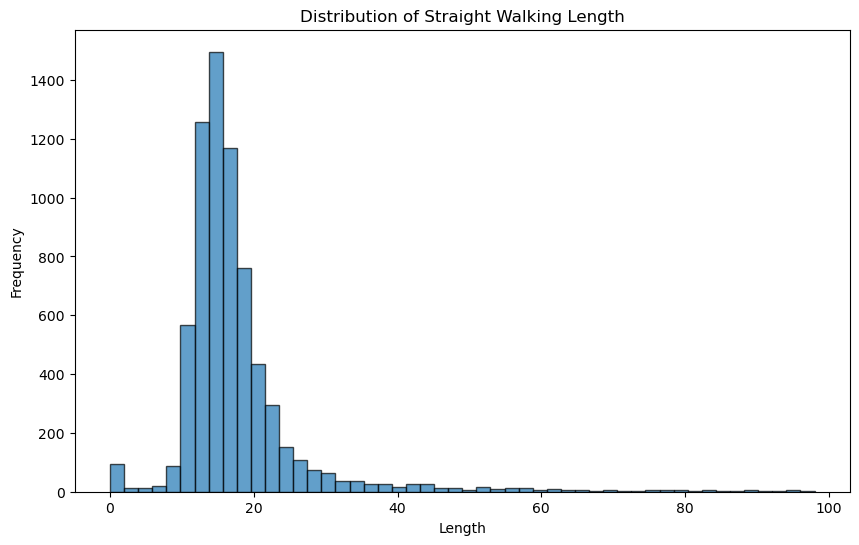

In [ ]:
# distribution of straight walking length (movement before T_Entry)
current_trial_num = np.nan
current_decision = np.nan
decision = np.nan
length = 0

straight_walking_length = []
trials = []
current_trial_speeds = []
current_trial_coords = []

for index, row in combined_df.iterrows():
    trial_num = row['trial']
    decision = row['decision']
    speed = row['Head velocity']
    head_x = row['warped Head x']
    head_y = row['warped Head y']
    
    if not pd.isna(decision):
        current_decision = decision    
        
    if trial_num != current_trial_num: # End of current trial and start of a new trial
        if length < 100:
            straight_walking_length.append(length)
            current_decision = np.nan
            current_trial_num = trial_num
        length = 0
        
    if pd.isna(current_decision) and index != 0:
        if speed < 300:
            length += 1

straight_walking_length_df = pd.DataFrame(straight_walking_length)
plt.figure(figsize=(10, 6))
plt.hist(straight_walking_length_df, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Straight Walking Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
straight_walking_speed_profiles = get_trial_profile(combined_df)
#plot_straight_walking_speed(straight_walking_speed_list[:50])
straight_walking_speed_profiles.head()

,speed 1,speed 2,speed 3,speed 4,speed 5,speed 6,speed 7,speed 8,speed 9,speed 10,speed 11,speed 12,final decision,average speed,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13
0,200.560089,192.480866,192.054202,185.782466,170.463378,161.285442,145.545740,134.549352,133.186663,116.349700,106.593211,96.848081,quit,151.742211,298.339819,106.815038,298.074981,100.134950,297.742077,93.727563,297.653720,87.326366,297.860475,81.137070,298.061938,75.458530,298.029043,70.082449,298.146834,65.232355,299.091369,60.847964,300.857253,56.774721,301.656490,52.979644,301.677435,49.426598,301.526447,46.201862
1,147.387071,157.952919,168.531497,197.201464,221.746063,231.604137,232.705087,229.357413,215.587327,188.836309,148.528750,125.178406,ACC,188.004305,293.697025,121.348562,293.512995,116.439108,293.405168,111.175115,293.394795,105.557408,293.458954,98.984339,293.560251,91.593498,293.693567,83.874511,293.872285,76.119734,294.105100,68.478032,294.425156,61.298919,294.952068,55.026468,295.862852,50.160005,297.269832,46.231760
2,177.952939,180.212622,161.985356,154.945946,163.386109,164.162926,165.154064,160.758897,156.754919,151.399339,126.283777,94.407486,quit,154.095503,290.953377,108.534816,291.729691,102.654071,292.856676,96.753647,293.779359,91.433554,294.219339,86.287464,294.383509,80.843735,294.660625,75.378659,295.400760,69.923503,296.681493,64.720174,298.126209,59.698707,299.605052,54.873601,300.964998,50.889872,301.826890,47.863286
3,135.784715,165.963204,187.277413,201.541330,202.926744,182.912246,178.919307,180.279776,169.866664,168.638335,179.022742,160.715028,ACC,172.709303,289.905958,117.851038,291.111284,113.488322,293.116389,108.332378,294.059470,102.161446,295.096157,95.523871,297.166798,89.084369,298.048403,83.051368,297.275996,77.137621,295.388447,71.432434,294.779795,65.803020,295.349918,60.210729,297.220262,54.543986,297.971756,49.239789
4,191.455549,190.987055,186.862597,188.778598,189.301041,189.998172,193.748189,191.014701,177.876715,167.111548,159.601680,152.280035,ACC,180.866983,287.427614,119.910430,288.829680,113.684497,289.782837,107.390020,290.197630,101.175094,290.517402,94.890604,291.237222,88.621761,292.359027,82.388632,293.108221,75.973961,293.397419,69.613376,293.741402,63.694138,294.712653,58.209080,296.323481,53.138752,297.963140,48.334868


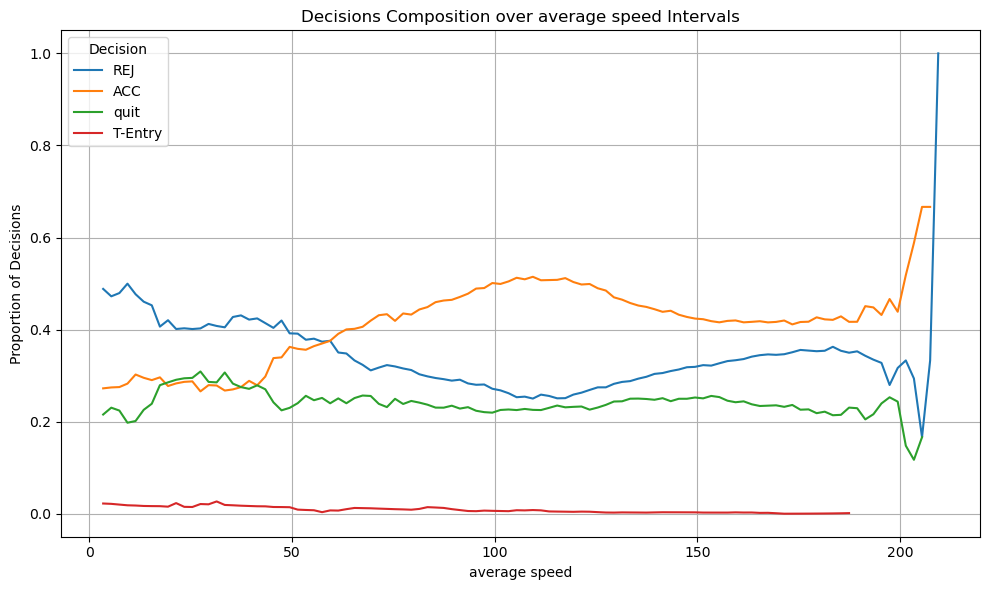

In [ ]:
plot_decision_composition(straight_walking_speed_profiles, column='average speed', window_size=30, step_size=2)

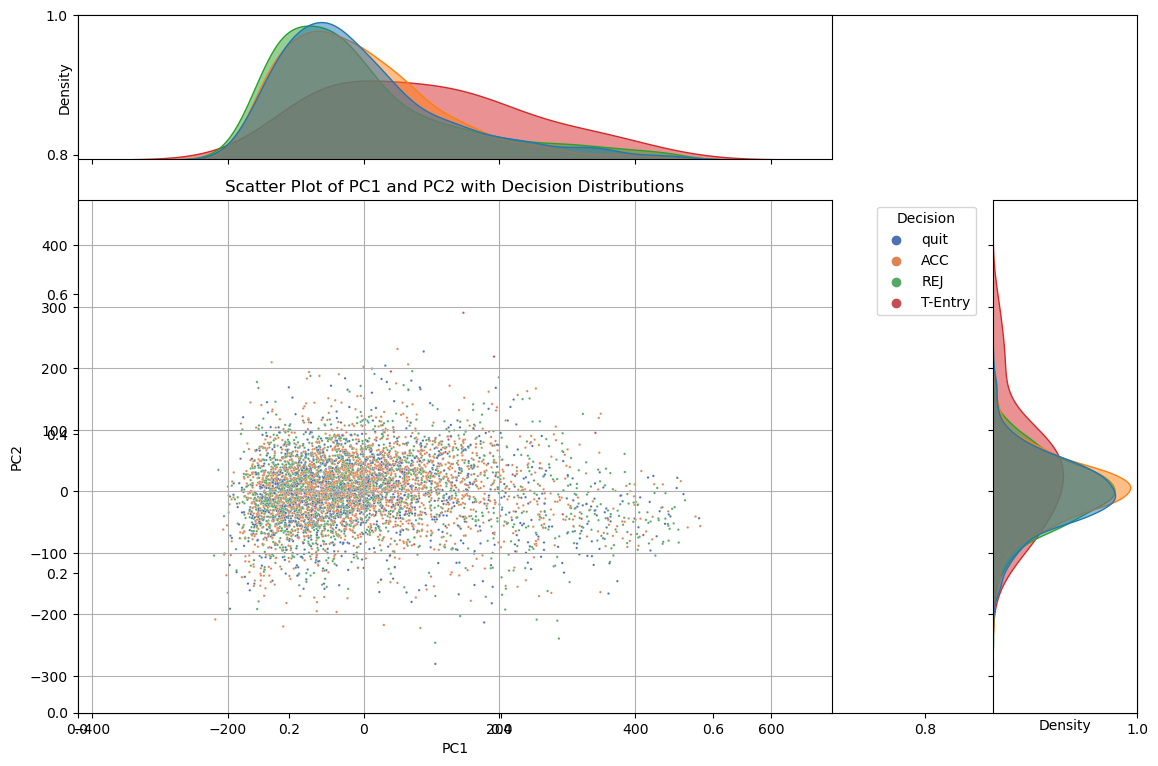

In [ ]:
pca_columns=[f'speed {i+1}' for i in range(12)]

"""
Performs PCA on the coordinate columns of the DataFrame and adds the principal components to the DataFrame.

Parameters:
df (pandas.DataFrame): The input DataFrame containing the coordinate data.
coord_columns (list): List of coordinate column names to include in PCA.
n_components (int): Number of principal components to extract.

Returns:
pandas.DataFrame: The DataFrame with the principal components added.
"""
# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(coords_data)

# Create a DataFrame for the principal components
pc_columns = [f'PC{i+1}' for i in range(2)]
pc_df = pd.DataFrame(principal_components, columns=pc_columns)

# Add the principal components to the original DataFrame
speed_pca = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), pc_df.reset_index(drop=True)], axis=1)

"""
Plots the PCA results, including a scatter plot of PC1 and PC2 and the variance explained by each PC.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with the principal components.
pca (PCA): The fitted PCA object.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Create gridspec for layout
from matplotlib.gridspec import GridSpec
gs = GridSpec(4, 4, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# Scatter plot of PC1 and PC2
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='final decision', palette='deep', s=3, ax=main_ax)

main_ax.set_xlabel('PC1')
main_ax.set_ylabel('PC2')
main_ax.set_title('Scatter Plot of PC1 and PC2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# New Code: KDE plot for the distribution of different decisions' points along PC1
sns.kdeplot(data=speed_pca, x='PC1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# New Code: KDE plot for the distribution of different decisions' points along PC2
sns.kdeplot(data=speed_pca, y='PC2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

In [ ]:
pca_columns = [f'speed {i+1}' for i in range(12)]

"""
Performs UMAP on the coordinate columns of the DataFrame and adds the UMAP components to the DataFrame.

Parameters:
df (pandas.DataFrame): The input DataFrame containing the coordinate data.
coord_columns (list): List of coordinate column names to include in UMAP.
n_components (int): Number of UMAP components to extract.

Returns:
pandas.DataFrame: The DataFrame with the UMAP components added.
"""
# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_components = reducer.fit_transform(coords_data)

# Create a DataFrame for the UMAP components
umap_columns = [f'UMAP{i+1}' for i in range(2)]
umap_df = pd.DataFrame(umap_components, columns=umap_columns)

# Add the UMAP components to the original DataFrame
speed_umap = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), umap_df.reset_index(drop=True)], axis=1)

"""
Plots the UMAP results, including a scatter plot of UMAP1 and UMAP2.

Parameters:
df_with_umap (pandas.DataFrame): The DataFrame with the UMAP components.
umap (UMAP): The fitted UMAP object.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Use Plotly Express for the main scatter plot
fig = px.scatter(speed_umap, x='UMAP1', y='UMAP2', color='final decision',
                 title='Scatter Plot of UMAP1 and UMAP2 with Decision Distributions',
                 labels={'UMAP1': 'UMAP1', 'UMAP2': 'UMAP2'},
                 hover_data=['final decision'])
fig.update_traces(marker=dict(size=4))
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



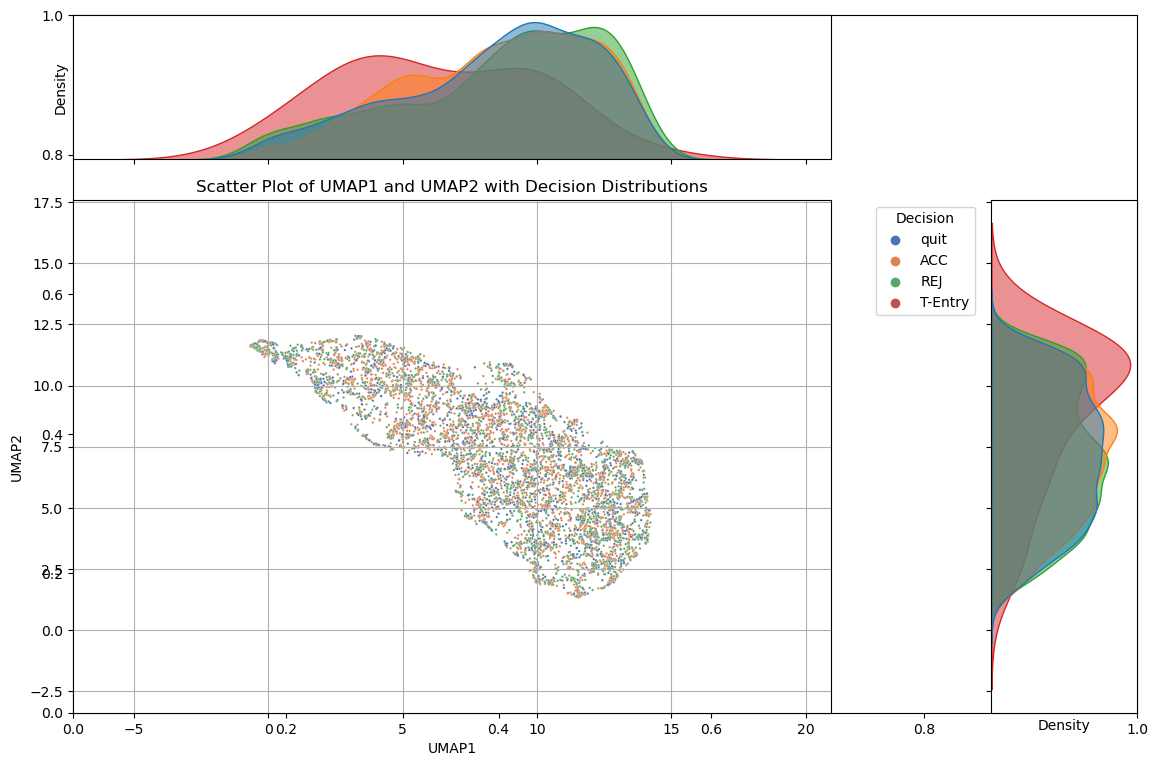

In [ ]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Create gridspec for layout
gs = GridSpec(4, 4, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# KDE plot of UMAP1 and UMAP2
sns.scatterplot(data=speed_umap, x='UMAP1', y='UMAP2', hue='final decision', palette='deep', s=3, ax=main_ax)

main_ax.set_xlabel('UMAP1')
main_ax.set_ylabel('UMAP2')
main_ax.set_title('Scatter Plot of UMAP1 and UMAP2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# KDE plot for the distribution of different decisions' points along UMAP1
sns.kdeplot(data=speed_umap, x='UMAP1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# KDE plot for the distribution of different decisions' points along UMAP2
sns.kdeplot(data=speed_umap, y='UMAP2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

In [ ]:
# Define the trajectory columns
pca_columns = [f'x{i}' for i in range(1, 14)] + [f'y{i}' for i in range(1, 14)]

# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_components = reducer.fit_transform(coords_data)

# Create a DataFrame for the UMAP components
umap_columns = [f'UMAP{i+1}' for i in range(2)]
umap_df = pd.DataFrame(umap_components, columns=umap_columns)

# Add the UMAP components to the original DataFrame
coords_umap = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), umap_df.reset_index(drop=True)], axis=1)

# Apply K-means clustering to UMAP components
kmeans = KMeans(n_clusters=5, random_state=42).fit(umap_df)

# Add cluster labels to the DataFrame
coords_umap['Cluster'] = kmeans.labels_

# Scatter plot of UMAP1 and UMAP2 with decisions using Plotly
fig = px.scatter(coords_umap, x='UMAP1', y='UMAP2', color='final decision',
                 title='Scatter Plot of UMAP1 and UMAP2 with Decision Distributions',
                 labels={'UMAP1': 'UMAP1', 'UMAP2': 'UMAP2'},
                 hover_data=['final decision'])
fig.update_traces(marker=dict(size=3))
fig.show()

# Scatter plot of UMAP1 and UMAP2 with clusters using Plotly
fig = px.scatter(coords_umap, x='UMAP1', y='UMAP2', color='Cluster',
                 title='Clusters on UMAP1 and UMAP2',
                 labels={'UMAP1': 'UMAP1', 'UMAP2': 'UMAP2'},
                 hover_data=['Cluster'])
fig.update_traces(marker=dict(size=3))
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



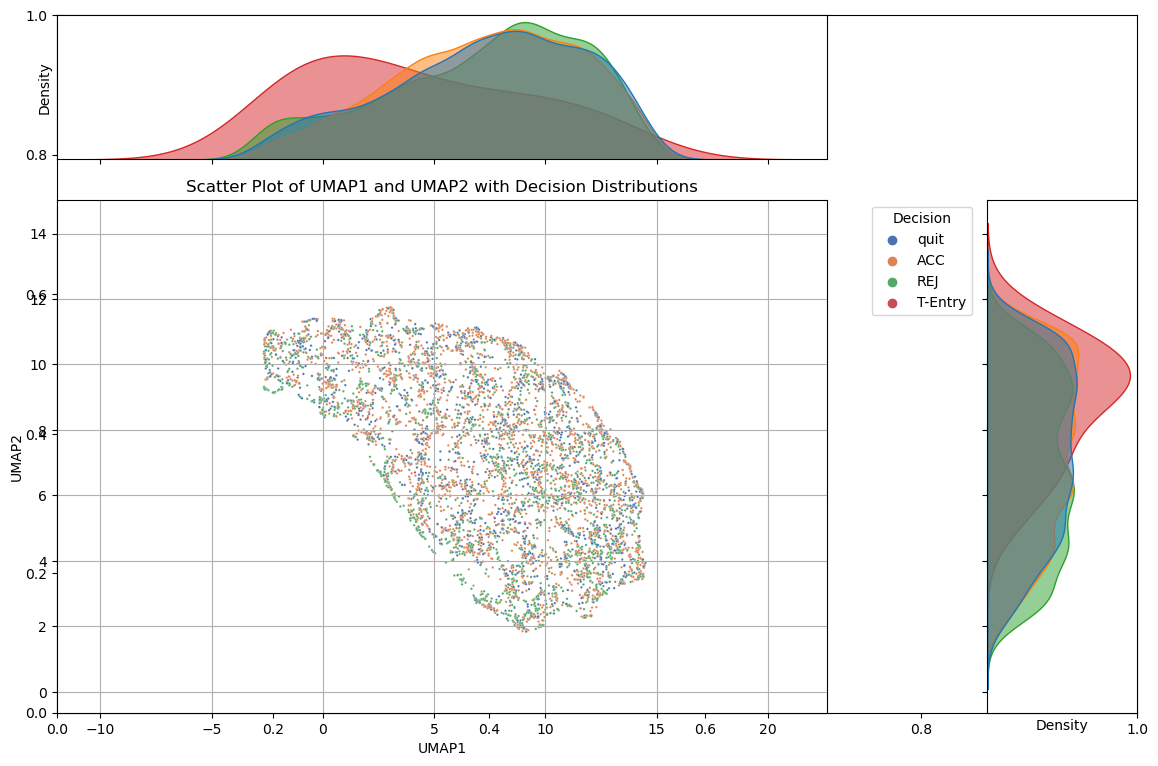

In [ ]:
# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Create gridspec for layout
gs = GridSpec(4, 4, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# KDE plot of UMAP1 and UMAP2
sns.scatterplot(data=coords_umap, x='UMAP1', y='UMAP2', hue='final decision', palette='deep', s=3, ax=main_ax)

main_ax.set_xlabel('UMAP1')
main_ax.set_ylabel('UMAP2')
main_ax.set_title('Scatter Plot of UMAP1 and UMAP2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# KDE plot for the distribution of different decisions' points along UMAP1
sns.kdeplot(data=coords_umap, x='UMAP1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# KDE plot for the distribution of different decisions' points along UMAP2
sns.kdeplot(data=coords_umap, y='UMAP2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

PC1 = -0.216 * x1 + -0.252 * x2 + -0.290 * x3 + -0.314 * x4 + -0.329 * x5 + -0.331 * x6 + -0.332 * x7 + -0.325 * x8 + -0.305 * x9 + -0.278 * x10 + -0.246 * x11 + -0.206 * x12


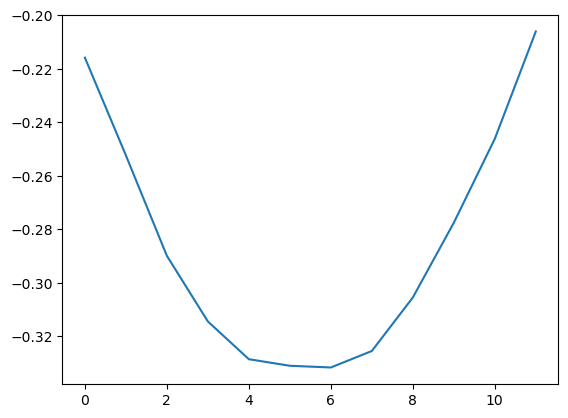

In [ ]:
# Output the expression of PC1
pc1_expression = " + ".join([f"{coef:.3f} * {col}" for coef, col in zip(pca.components_[0], pca_columns)])
print(f"PC1 = {pc1_expression}")
plt.plot(pca.components_[0])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



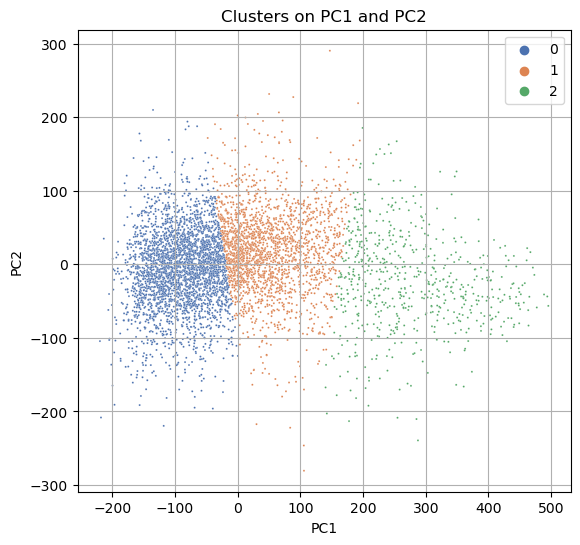

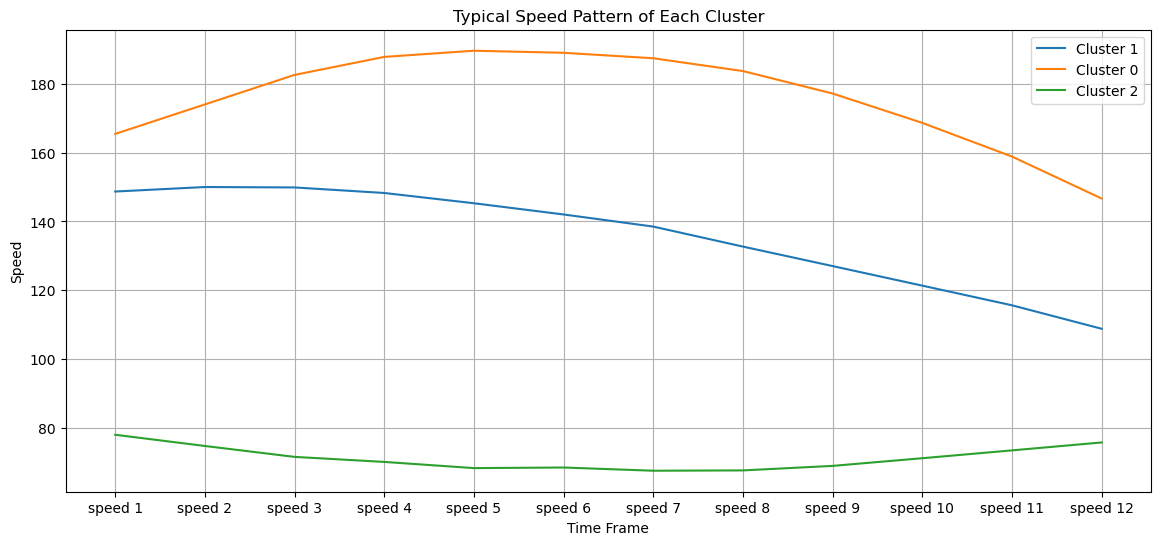

In [ ]:

"""
Clusters the PCA-transformed data using K-means and adds cluster labels to the DataFrame.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components.
n_clusters (int): The number of clusters to form.

Returns:
pandas.DataFrame: The DataFrame with cluster labels added.
"""
# Extract the PCA columns
pca_columns = ['PC1', 'PC2']
pca_data = speed_pca[pca_columns]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_data)

# Add cluster labels to the DataFrame
speed_pca['Cluster'] = kmeans.labels_


"""
Plots the PCA results with clusters and decision labels.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components and cluster labels.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Scatter plot of PC1 and PC2 with clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
clusters = speed_pca['Cluster'].unique()
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='Cluster', palette='deep', s=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters on PC1 and PC2')
plt.legend()
plt.grid(True)
plt.show()

# Plot the typical speed pattern of each cluster
"""
Plots the typical speed pattern for each cluster.

Parameters:
speed_pca (pandas.DataFrame): The DataFrame with speed profiles and cluster labels.
"""
plt.figure(figsize=(14, 6))

for cluster in clusters:
    cluster_data = speed_pca[speed_pca['Cluster'] == cluster]
    mean_speed_pattern = cluster_data[[f'speed {i+1}' for i in range(12)]].mean()
    plt.plot(mean_speed_pattern, label=f'Cluster {cluster}')

plt.xlabel('Time Frame')
plt.ylabel('Speed')
plt.title('Typical Speed Pattern of Each Cluster')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Function to calculate the slope and intercept for each trial using sklearn
def calculate_slope_intercept(df):
    slopes = []
    intercepts = []

    for index, row in df.iterrows():
        x_coords = row[[f'x{i+1}' for i in range(13)]].values.reshape(-1, 1)
        y_coords = row[[f'y{i+1}' for i in range(13)]].values.reshape(-1, 1)
        
        # Perform linear regression using sklearn
        reg = LinearRegression().fit(y_coords, x_coords)
        slope = reg.coef_[0][0]
        intercept = reg.intercept_[0]
        
        slopes.append(slope)
        intercepts.append(intercept)
    
    df['slope'] = slopes
    df['intercept'] = intercepts

    return df

# Apply the function to the DataFrame
straight_walking_speed_profiles = calculate_slope_intercept(straight_walking_speed_profiles)

Text(0, 0.5, 'trial counts')

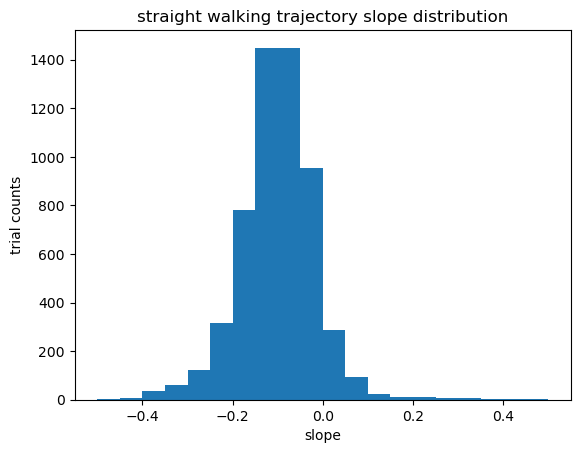

In [ ]:
plt.hist(straight_walking_speed_profiles['slope'], bins=20, range=(-0.5, 0.5))
plt.title('straight walking trajectory slope distribution')
plt.xlabel('slope')
plt.ylabel('trial counts')

In [ ]:
print(straight_walking_speed_profiles.shape)
straight_walking_speed_profiles.describe()

(5709, 42)


,speed 1,speed 2,speed 3,speed 4,speed 5,speed 6,speed 7,speed 8,speed 9,speed 10,speed 11,speed 12,average speed,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,slope,intercept
count,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000,5709.000000
mean,149.904081,154.584643,158.769965,160.819319,160.507720,159.035476,156.818848,152.757909,147.390917,141.043440,134.024942,125.329897,148.314970,289.337279,106.689009,289.751270,101.786844,290.165614,96.720650,290.584344,91.509789,291.035427,86.234132,291.493612,80.967061,291.957280,75.747539,292.423879,70.605889,292.905923,65.605564,293.457403,60.800023,294.096766,56.226236,294.773918,51.906883,295.420626,47.898769,-0.102523,299.850000
std,40.840607,41.782253,43.673869,44.642383,45.263301,45.187748,45.454331,45.470509,44.493390,42.531296,40.757669,37.858800,37.474733,5.532755,15.686304,5.347401,14.758621,5.186526,13.731476,5.029508,12.590861,4.897973,11.362471,4.791747,10.085519,4.683321,8.789169,4.585470,7.471861,4.521815,6.144921,4.519174,4.853649,4.603644,3.660881,4.776562,2.616767,5.033502,1.847199,0.209204,10.589518
min,0.512061,0.741833,0.682549,0.119328,0.450017,0.534800,0.944998,1.056770,0.648874,1.627407,2.100442,6.460543,3.390272,210.728985,-6.587989,210.398609,-2.730587,210.068232,3.296928,209.737856,10.061913,209.407479,15.432340,209.077102,19.016012,208.746726,21.621964,208.416349,21.795662,208.085972,21.501383,207.755596,18.647106,205.076596,14.867183,199.731836,11.666608,195.118687,10.894272,-4.086531,49.498013
25%,132.316038,137.934358,139.932138,140.359861,138.695419,136.637058,134.365198,128.856857,122.339434,116.905160,110.518917,102.317126,131.667029,285.705140,99.673610,286.063076,95.032017,286.457903,90.122434,287.004834,85.254576,287.789478,80.480391,288.459648,75.874557,289.069688,71.125617,289.639791,66.436996,290.149023,62.111383,290.853780,57.970413,291.643797,53.954338,292.555637,50.285746,293.088567,46.738343,-0.147795,296.250345
50%,155.374324,162.177154,167.311122,169.582212,169.135345,167.761691,165.543243,159.887928,152.840754,145.302731,137.350150,127.331687,157.513128,289.754929,110.464974,290.097193,105.086603,290.556966,99.471592,290.994331,93.969765,291.407425,88.284926,291.911844,82.579276,292.343754,76.935451,292.722627,71.590022,293.142212,66.351237,293.683373,61.291616,294.199774,56.384287,295.138168,51.815574,296.137381,47.708199,-0.099327,300.063626
75%,175.169782,180.617523,187.962973,191.508530,192.297492,190.849487,188.487277,184.293613,177.746745,171.435512,163.175682,151.048410,175.327968,293.058247,117.879578,293.459073,112.582610,293.751544,106.742252,294.054151,100.371824,294.417659,94.354342,294.811257,88.178878,295.318669,81.899169,295.802034,75.848206,296.344559,69.848999,296.782008,63.979144,297.315806,58.548745,297.884407,53.481315,298.492945,48.871002,-0.049779,303.887891
max,445.135337,399.373547,432.341506,318.603434,310.590601,264.888440,273.432395,289.003713,394.912483,269.555547,306.414966,252.907804,209.512597,322.208761,131.886318,322.127522,129.411347,321.932464,125.667587,321.775456,124.064100,321.532925,122.867027,320.934481,122.248415,319.992303,122.087338,319.355596,122.019216,319.068316,121.996695,319.042135,122.506997,319.333258,124.568287,320.113771,127.466491,321.410008,121.736075,8.697743,485.011413


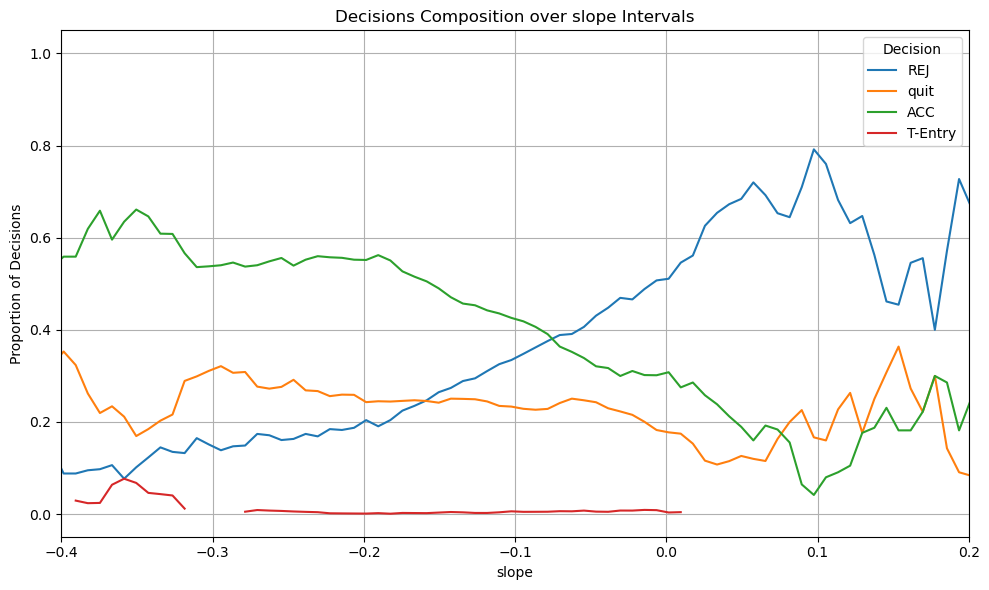

In [ ]:
plot_decision_composition(straight_walking_speed_profiles, column='slope', window_size=0.05, step_size=0.008, x_range=(-0.4, 0.2))

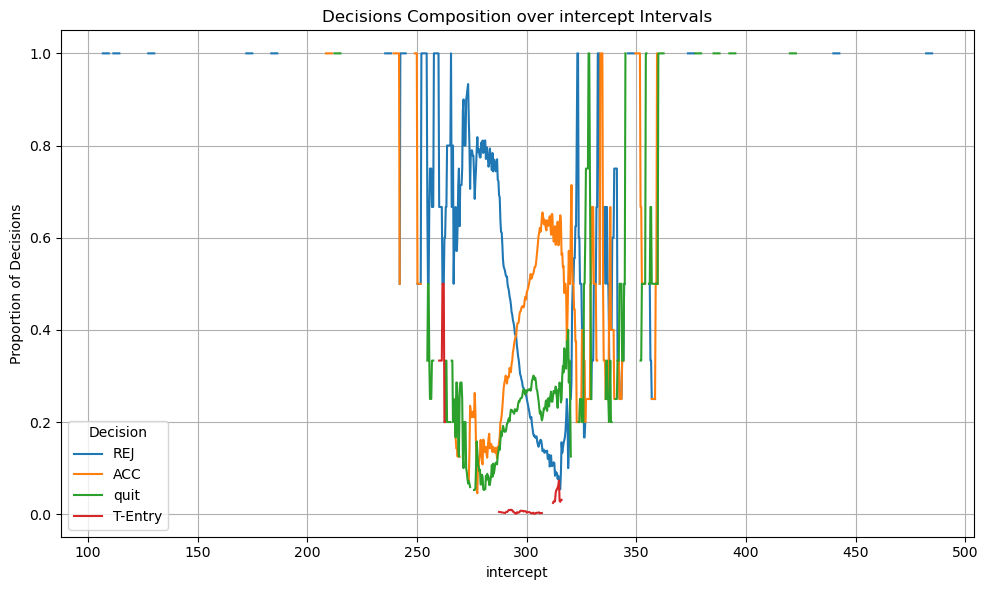

In [ ]:
plot_decision_composition(straight_walking_speed_profiles, column='intercept', window_size=3, step_size=0.3)